In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import gaussian_kde
from scipy.stats import norm
from scipy.stats import t
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [96]:
def null_share(df):
    df = df.isnull().sum() / len(df) * 100
    return df

def grouped_null_share(df, group):
    df = df.groupby(group).apply(lambda x: (x.isnull().sum() / len(x)) * 100)
    return df

In [117]:
eu27_codes = ['AT', 'BE', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'EL', 'HU', 'IE', 'IT', 'LV', 'LT',
              'LU', 'MT', 'NL', 'PL', 'PT', 'RO', 'SK', 'SI', 'ES', 'SE']



In [3]:
len(eu27_codes)

27

In [4]:
yields = pd.read_csv('yields.csv')

In [5]:
yields.head()

,Unnamed: 0,freq,crops,strucpro,geo\TIME_PERIOD,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,246,A,C0000,YI_HU_EU,AT,NaN,NaN,NaN,NaN,NaN,...,5.85,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,247,A,C0000,YI_HU_EU,BG,NaN,NaN,NaN,NaN,NaN,...,4.67,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,248,A,C0000,YI_HU_EU,CH,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,249,A,C0000,YI_HU_EU,CY,NaN,NaN,NaN,NaN,NaN,...,1.69,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,250,A,C0000,YI_HU_EU,CZ,NaN,NaN,NaN,NaN,NaN,...,5.32,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(yields.crops.unique())

59

In [7]:
yields.drop(columns = ['Unnamed: 0', 'freq'], inplace = True)

In [8]:
yields.rename(columns = {'geo\TIME_PERIOD': 'geo'}, inplace = True)

In [9]:
yields.head()

,crops,strucpro,geo,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,C0000,YI_HU_EU,AT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.85,7.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C0000,YI_HU_EU,BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.67,4.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C0000,YI_HU_EU,CH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C0000,YI_HU_EU,CY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.69,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C0000,YI_HU_EU,CZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.32,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
yields_long = yields.melt(id_vars = ['crops', 'strucpro', 'geo'])

In [11]:
yields_long.shape

(34546, 5)

In [12]:
yields_long.dropna(inplace = True)
yields_long.shape

(16280, 5)

In [13]:
yields_long.head()

,crops,strucpro,geo,variable,value
64,C1100,YI_HU_EU,EL,2000,2.34
66,C1100,YI_HU_EU,FI,2000,3.59
68,C1100,YI_HU_EU,HR,2000,4.75
70,C1100,YI_HU_EU,IE,2000,8.85
75,C1100,YI_HU_EU,LV,2000,2.70


In [14]:
yields_long.crops.unique()

array(['C1100', 'C1110', 'C1111', 'C1112', 'C1120', 'C1200', 'C1210',
       'C1300', 'C1310', 'C1320', 'C1400', 'C1410', 'C1420', 'C1500',
       'C1600', 'C1700', 'C1900', 'C2000', 'C2100', 'C2200', 'G0000',
       'G1000', 'G2000', 'G2100', 'G2900', 'G3000', 'G9100', 'G9900',
       'I1100', 'I1110', 'I1110-1130', 'I1111', 'I1112', 'I1120', 'I1130',
       'I1140', 'I1150', 'I1190', 'I2100', 'I2200', 'I2300', 'I3000',
       'I4000', 'I5000', 'P1100', 'P1200', 'P1300', 'P9000', 'R1000',
       'R2000', 'R9000', 'C0000', 'C1000', 'C1220', 'I0000', 'I6000',
       'P0000', 'R0000', 'I2900'], dtype=object)

In [15]:
yields_long_ie = yields_long[yields_long.geo == 'IE']

In [16]:
yields_long_ie.head()

,crops,strucpro,geo,variable,value
70,C1100,YI_HU_EU,IE,2000,8.85
107,C1110,YI_HU_EU,IE,2000,8.88
144,C1111,YI_HU_EU,IE,2000,9.26
178,C1112,YI_HU_EU,IE,2000,7.57
314,C1300,YI_HU_EU,IE,2000,6.81


In [17]:
yields_long_ie.crops.unique()

array(['C1100', 'C1110', 'C1111', 'C1112', 'C1300', 'C1310', 'C1320',
       'C1400', 'C1410', 'G3000', 'G9100', 'I1100', 'I1110', 'I1110-1130',
       'R1000', 'R2000', 'I1111', 'I1112', 'P1100', 'P1200', 'C0000',
       'C1000'], dtype=object)

In [18]:
yields_long_potatoes = yields_long[yields_long.crops == 'R1000']

In [132]:
yields_long_potatoes.head()

,crops,strucpro,geo,variable,value
1410,R1000,YI_HU_EU,BA,2000,6.52
1419,R1000,YI_HU_EU,EL,2000,29.92
1421,R1000,YI_HU_EU,FI,2000,24.46
1423,R1000,YI_HU_EU,HR,2000,11.50
1425,R1000,YI_HU_EU,IE,2000,33.60


In [20]:
yields_long_potatoes_sample = yields_long_potatoes[(yields_long_potatoes.geo.isin(
    ['AT', 'BE', 'DE', 'DK', 'IE', 'NL'])) & 
                                                   (yields_long_potatoes.variable >= '2010')]

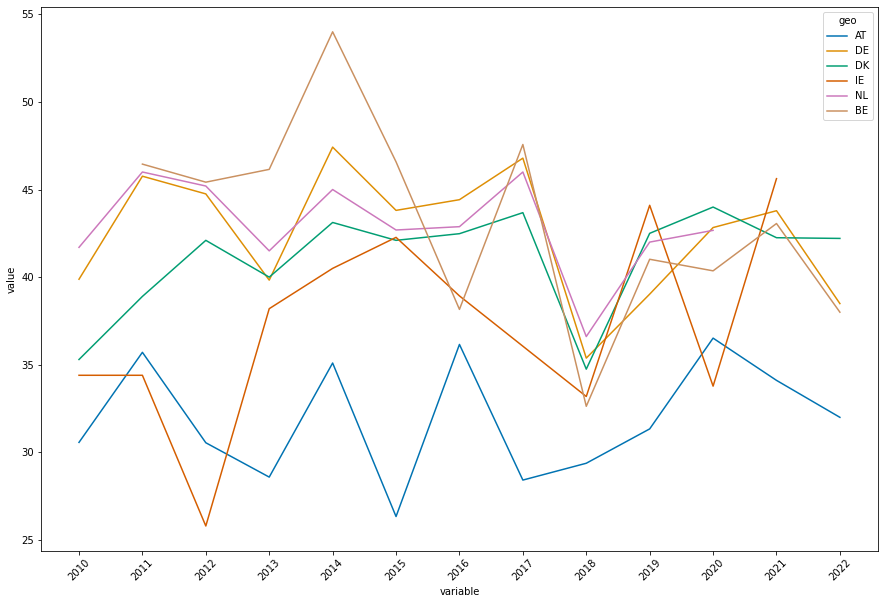

In [21]:
f, ax = plt.subplots(figsize = (15, 10))

sns.set_palette('colorblind')

ax = sns.lineplot(x = 'variable', y = 'value', hue = 'geo', data = yields_long_potatoes_sample)

plt.setp(ax.get_xticklabels(), rotation = 45)

plt.show()

In [110]:
yields_potatoes_eu = yields_long_potatoes[yields_long_potatoes.geo.isin(eu27_codes)]

In [112]:
yields_potatoes_eu_mean = yields_potatoes_eu.groupby('geo').mean().reset_index().sort_values('value')

In [113]:
yields_potatoes_eu_mean.head()

,geo,value
22,RO,14.836522
16,LT,15.728462
12,HR,15.844545
2,BG,16.486923
18,LV,16.716000


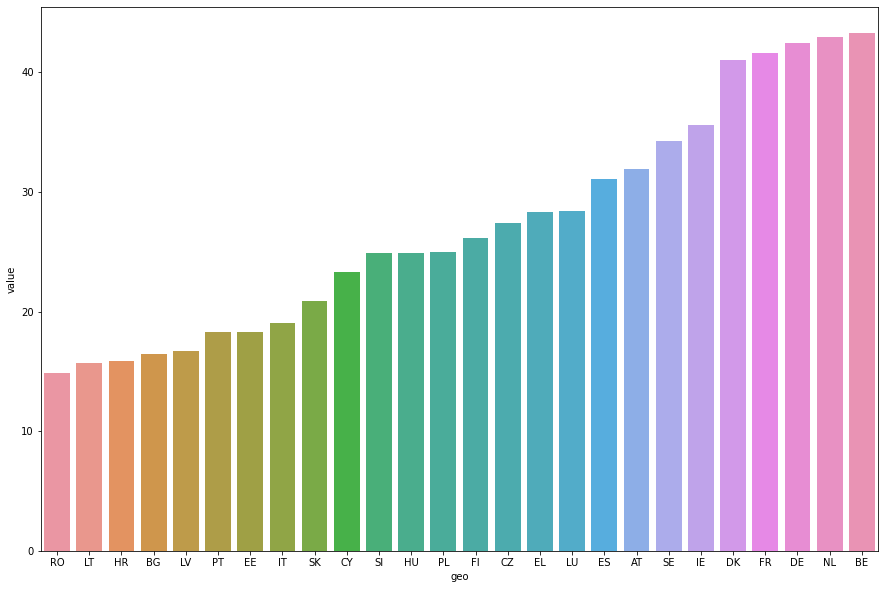

In [114]:
f, ax = plt.subplots(figsize = (15, 10))

ax = sns.barplot(x = 'geo', y = 'value', data = yields_potatoes_eu_mean)

plt.show()

In [26]:
# Let's compare Irish potato yields to that of the whole EU

In [118]:
yields_potatoes_eu.head()

,crops,strucpro,geo,variable,value
1419,R1000,YI_HU_EU,EL,2000,29.92
1421,R1000,YI_HU_EU,FI,2000,24.46
1423,R1000,YI_HU_EU,HR,2000,11.50
1425,R1000,YI_HU_EU,IE,2000,33.60
1430,R1000,YI_HU_EU,LV,2000,14.57


In [33]:
yields_ie = yields_long_potatoes[yields_long_potatoes.geo == 'IE']
yields_ie.head()

,crops,strucpro,geo,variable,value
1425,R1000,YI_HU_EU,IE,2000,33.6
2927,R1000,YI_HU_EU,IE,2001,33.5
4429,R1000,YI_HU_EU,IE,2002,33.7
5931,R1000,YI_HU_EU,IE,2003,34.5
7433,R1000,YI_HU_EU,IE,2004,41.4


In [35]:
data = yields_ie.value.values

ci_norm = norm.interval(0.95, loc=np.mean(data), scale=np.std(data)/np.sqrt(len(data)))

# Print the confidence interval
print(ci_norm)

(33.52491336020901, 37.74080092550527)


In [36]:
# Compute the 95% confidence interval for the mean
ci_t = t.interval(0.95, len(data)-1, loc=np.mean(data), scale=np.std(data)/np.sqrt(len(data)))

# Print the confidence interval
print(ci_t)

(33.389400776220306, 37.876313509493976)


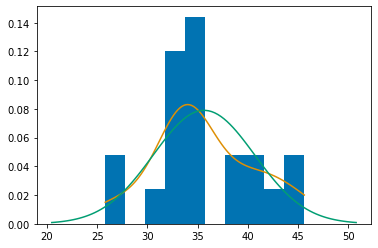

In [38]:
yields_ie_mean = yields_ie.value.mean()
yields_ie_std = yields_ie.value.std()

kde = gaussian_kde(yields_ie.value)

sns.set_palette('colorblind')

fig, ax = plt.subplots()

ax.hist(yields_ie.value, density = True)

kde_range = np.linspace(min(yields_ie.value), max(yields_ie.value), 100)

ax.plot(kde_range, kde(kde_range))


# Generate the data for the normal curve
x_norm = np.linspace(yields_ie_mean - 3*yields_ie_std, yields_ie_mean + 3*yields_ie_std, 100)
y_norm = norm.pdf(x_norm, yields_ie_mean, yields_ie_std)

# Plot the normal curve
plt.plot(x_norm, y_norm)

# Show the plot
plt.show()

In [39]:


shapiro(yields_ie.value)

ShapiroResult(statistic=0.9325054883956909, pvalue=0.1545199602842331)

In [47]:
ci_boot_result = bs.bootstrap(yields_ie.value.values, stat_func=bs_stats.mean, alpha=0.05)
ci_boot = (ci_boot.lower_bound, ci_boot.upper_bound)
#ci_boot.value

In [50]:
print(ci_norm)
print(ci_t)
print(ci_boot)

(33.52491336020901, 37.74080092550527)
(33.389400776220306, 37.876313509493976)
(33.50179761904762, 37.7295238095238)


In [52]:
ci_dict = {'Normal': ci_norm,
           'T': ci_t,
           'Bootstrap': ci_boot}

ci_dict

{'Normal': (33.52491336020901, 37.74080092550527),
 'T': (33.389400776220306, 37.876313509493976),
 'Bootstrap': (33.50179761904762, 37.7295238095238)}

In [55]:
# Recall that on the final week, David provided a bunch of links, one of which was converting a dataframe to a table
# and getting the latex code etc

ci_df = pd.DataFrame(ci_dict)
ci_df['Bound'] = ['Lower', 'Upper']
ci_df.head()

,Normal,T,Bootstrap,Bound
0,33.524913,33.389401,33.501798,Lower
1,37.740801,37.876314,37.729524,Upper


In [58]:
grouped_null_share(yields_long_potatoes, 'variable')

,crops,strucpro,geo,variable,value
variable,,,,,
2000,0.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,0.0,0.0
2005,0.0,0.0,0.0,0.0,0.0
2006,0.0,0.0,0.0,0.0,0.0
2007,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0


In [119]:
yields_potatoes_country_wide = yields_potatoes_eu.pivot_table(index = ['crops', 'strucpro', 'variable'],
                                                                columns = 'geo', values = 'value')

yields_potatoes_country_wide.reset_index(inplace = True)

grouped_null_share(yields_potatoes_country_wide, 'variable')

geo,crops,strucpro,variable,AT,BE,BG,CY,CZ,DE,DK,...,LT,LU,LV,NL,PL,PT,RO,SE,SI,SK
variable,,,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0
2001,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0
2002,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0
2003,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0
2004,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,...,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0
2005,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,...,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0
2006,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,...,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0
2007,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,...,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0
2008,0.0,0.0,0.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,...,100.0,100.0,0.0,100.0,100.0,0.0,0.0,100.0,100.0,100.0


In [120]:
yields_potatoes_country_wide_2010 = yields_potatoes_country_wide[yields_potatoes_country_wide.variable >= '2010']

#yields_potatoes_country_wide_2010.dropna(axis = 1, inplace = True)

grouped_null_share(yields_potatoes_country_wide_2010, 'variable')



geo,crops,strucpro,variable,AT,BE,BG,CY,CZ,DE,DK,...,LT,LU,LV,NL,PL,PT,RO,SE,SI,SK
variable,,,,,,,,,,,,,,,,,,,,,
2010,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
yields_ie['value_lag'] = yields_ie.value.shift(periods = 1)
yields_ie.dropna(inplace = True)
yields_ie.head()

model = sm.OLS(yields_ie.value, yields_ie.value_lag)
results = model.fit()

dw = sm.stats.stattools.durbin_watson(results.resid)

# interpret the Durbin-Watson statistic
if dw < 2:
    print(f"The data are positively autocorrelated with dw = {dw}")
elif dw > 2:
    print(f"The data are negatively autocorrelated with dw = {dw}")
else:
    print("The data are not autocorrelated")

The data are negatively autocorrelated with dw = 2.834056830855806


C:\Users\justi\AppData\Local\Temp\ipykernel_6476\2581046059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yields_ie['value_lag'] = yields_ie.value.shift(periods = 1)
C:\Users\justi\AppData\Local\Temp\ipykernel_6476\2581046059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yields_ie.dropna(inplace = True)


In [121]:
null_share(yields_potatoes_country_wide_2010)

geo
crops        0.000000
strucpro     0.000000
variable     0.000000
AT           0.000000
BE           7.692308
BG           0.000000
CY           0.000000
CZ           0.000000
DE           0.000000
DK           0.000000
EE           0.000000
EL           0.000000
ES           0.000000
FI           0.000000
FR           7.692308
HR           7.692308
HU          15.384615
IE          15.384615
IT          30.769231
LT           0.000000
LU           0.000000
LV          23.076923
NL          15.384615
PL           0.000000
PT           0.000000
RO           0.000000
SE           0.000000
SI           0.000000
SK           0.000000
dtype: float64

In [122]:
yields_potatoes_country_wide_2010.tail()

geo,crops,strucpro,variable,AT,BE,BG,CY,CZ,DE,DK,...,LT,LU,LV,NL,PL,PT,RO,SE,SI,SK
18,R1000,YI_HU_EU,2018,29.38,32.63,18.57,23.22,25.50,35.38,34.75,...,15.51,25.84,19.90,36.61,25.10,20.75,17.44,30.24,25.93,21.90
19,R1000,YI_HU_EU,2019,31.34,41.02,21.25,21.14,27.19,39.03,42.50,...,18.09,25.50,NaN,42.00,21.43,23.59,15.09,35.81,23.59,22.27
20,R1000,YI_HU_EU,2020,36.52,40.36,19.30,24.20,29.16,42.83,44.00,...,15.72,26.25,21.28,42.67,34.77,23.37,15.85,36.44,30.27,23.75
21,R1000,YI_HU_EU,2021,34.11,43.06,17.90,22.19,29.44,43.79,42.25,...,13.06,25.74,15.75,NaN,30.03,24.60,16.54,34.78,23.42,24.88
22,R1000,YI_HU_EU,2022,32.00,38.00,18.10,24.00,28.32,38.49,42.21,...,16.00,22.81,22.67,NaN,28.00,23.95,15.08,40.20,19.10,23.65


In [123]:
yields_potatoes_country_wide_2010.fillna(yields_potatoes_country_wide_2010.mean(), inplace = True)

C:\Users\justi\AppData\Local\Temp\ipykernel_6476\1546117414.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  yields_potatoes_country_wide_2010.fillna(yields_potatoes_country_wide_2010.mean(), inplace = True)
C:\Users\justi\AppData\Local\Temp\ipykernel_6476\1546117414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yields_potatoes_country_wide_2010.fillna(yields_potatoes_country_wide_2010.mean(), inplace = True)


In [124]:
yields_potatoes_country_wide_2010.tail()

geo,crops,strucpro,variable,AT,BE,BG,CY,CZ,DE,DK,...,LT,LU,LV,NL,PL,PT,RO,SE,SI,SK
18,R1000,YI_HU_EU,2018,29.38,32.63,18.57,23.22,25.50,35.38,34.75,...,15.51,25.84,19.90,36.610000,25.10,20.75,17.44,30.24,25.93,21.90
19,R1000,YI_HU_EU,2019,31.34,41.02,21.25,21.14,27.19,39.03,42.50,...,18.09,25.50,18.98,42.000000,21.43,23.59,15.09,35.81,23.59,22.27
20,R1000,YI_HU_EU,2020,36.52,40.36,19.30,24.20,29.16,42.83,44.00,...,15.72,26.25,21.28,42.670000,34.77,23.37,15.85,36.44,30.27,23.75
21,R1000,YI_HU_EU,2021,34.11,43.06,17.90,22.19,29.44,43.79,42.25,...,13.06,25.74,15.75,42.931818,30.03,24.60,16.54,34.78,23.42,24.88
22,R1000,YI_HU_EU,2022,32.00,38.00,18.10,24.00,28.32,38.49,42.21,...,16.00,22.81,22.67,42.931818,28.00,23.95,15.08,40.20,19.10,23.65


In [125]:
null_share(yields_potatoes_country_wide_2010)

geo
crops       0.0
strucpro    0.0
variable    0.0
AT          0.0
BE          0.0
BG          0.0
CY          0.0
CZ          0.0
DE          0.0
DK          0.0
EE          0.0
EL          0.0
ES          0.0
FI          0.0
FR          0.0
HR          0.0
HU          0.0
IE          0.0
IT          0.0
LT          0.0
LU          0.0
LV          0.0
NL          0.0
PL          0.0
PT          0.0
RO          0.0
SE          0.0
SI          0.0
SK          0.0
dtype: float64

In [126]:
yields_potatoes_country_wide_2010.shape

(13, 29)

In [127]:
def test_independence(df, var1, var):
    r, p = pearsonr(df[var1], df[var2])
    return r, p

In [128]:
variables = list(yields_potatoes_country_wide_2010.select_dtypes(include = 'float').columns)

results = []

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        r, p = test_independence(yields_potatoes_country_wide_2010, var1, var2)
        if p < 0.05:
            results.append('There is a significant relationship between {} and {}'.format(var1, var2))
        else:
            results.append('There is no significant relationship between {} and {}'.format(var1, var2))

In [129]:
results_ie = [s for s in results if 'IE' in s]

In [ ]:
def count_results(results_list, search_word):
    count = 0
    for result in results_list:
        if search_word in result:
            count += 1
    return count


In [130]:
print(len(results_ie))
results_ie

# Only one of the 25 results shows a statistically significant relationship, seen as we were using a p-value of 0.05
# It's possible that this is entirely due to chance so I will treat the data as being independent

25


['There is no significant relationship between AT and IE',
 'There is no significant relationship between BE and IE',
 'There is no significant relationship between BG and IE',
 'There is no significant relationship between CY and IE',
 'There is no significant relationship between CZ and IE',
 'There is no significant relationship between DE and IE',
 'There is no significant relationship between DK and IE',
 'There is no significant relationship between EE and IE',
 'There is no significant relationship between EL and IE',
 'There is a significant relationship between ES and IE',
 'There is no significant relationship between FI and IE',
 'There is no significant relationship between FR and IE',
 'There is no significant relationship between HR and IE',
 'There is no significant relationship between HU and IE',
 'There is no significant relationship between IE and IT',
 'There is no significant relationship between IE and LT',
 'There is no significant relationship between IE and LU'

In [141]:
count_results(results_ie, 'no')

24

In [133]:
results_normal = []

for var in variables:
    stat, p = shapiro(yields_potatoes_country_wide_2010[var])
    
    if p > 0.05:
        
        results_normal.append(f'The data for {var} is likely normally distributed')
        
    else:
        
        results_normal.append(f'The data for {var} is likely not normally distributed')

In [134]:
print(len(results_normal))
results_normal

# The data is likely normally distributed for all countries data with the exception of DK
# Howvever, we're using a p-value of 0.05 and seen as we performed 24 tests
# It's possible that this result is just due to chance
# As such I will treat the data as being normally distributed

26


['The data for AT is likely normally distributed',
 'The data for BE is likely normally distributed',
 'The data for BG is likely normally distributed',
 'The data for CY is likely normally distributed',
 'The data for CZ is likely normally distributed',
 'The data for DE is likely normally distributed',
 'The data for DK is likely not normally distributed',
 'The data for EE is likely normally distributed',
 'The data for EL is likely not normally distributed',
 'The data for ES is likely normally distributed',
 'The data for FI is likely normally distributed',
 'The data for FR is likely normally distributed',
 'The data for HR is likely normally distributed',
 'The data for HU is likely normally distributed',
 'The data for IE is likely normally distributed',
 'The data for IT is likely not normally distributed',
 'The data for LT is likely normally distributed',
 'The data for LU is likely normally distributed',
 'The data for LV is likely normally distributed',
 'The data for NL i

In [142]:
count_results(results_normal, 'not')

4

In [135]:
# Finally let's test for constant variance

results_variance = []

for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        
        var1 = variables[i]
        var2 = variables[j]
        
        stat, p = levene(yields_potatoes_country_wide_2010[var1], yields_potatoes_country_wide_2010[var2])
        
        if p > 0.05:
            results_variance.append(f'The variance of {var1} and {var2} are likely equal')
        else:
            results_variance.append(f'The variance of {var1} and {var2} are likely not equal')

In [136]:
results_variance_ie = [s for s in results_variance if 'IE' in s]

In [137]:
results_variance_ie

# The variances are equal for some, unequal for others

['The variance of AT and IE are likely equal',
 'The variance of BE and IE are likely equal',
 'The variance of BG and IE are likely equal',
 'The variance of CY and IE are likely equal',
 'The variance of CZ and IE are likely equal',
 'The variance of DE and IE are likely equal',
 'The variance of DK and IE are likely equal',
 'The variance of EE and IE are likely equal',
 'The variance of EL and IE are likely equal',
 'The variance of ES and IE are likely not equal',
 'The variance of FI and IE are likely not equal',
 'The variance of FR and IE are likely not equal',
 'The variance of HR and IE are likely not equal',
 'The variance of HU and IE are likely not equal',
 'The variance of IE and IT are likely equal',
 'The variance of IE and LT are likely not equal',
 'The variance of IE and LU are likely equal',
 'The variance of IE and LV are likely not equal',
 'The variance of IE and NL are likely not equal',
 'The variance of IE and PL are likely equal',
 'The variance of IE and PT 

In [139]:
count_results(results_variance_ie, 'not')

9

In [64]:
# The data is independent and normal for a large majority of countries.
# Although for many countries, IE does not have equal variance
# The assumptions for ANOVA are almost met so I will in the first instance run an ANOVA

In [143]:
yields_potatoes_country_wide_2010.head()

geo,crops,strucpro,variable,AT,BE,BG,CY,CZ,DE,DK,...,LT,LU,LV,NL,PL,PT,RO,SE,SI,SK
10,R1000,YI_HU_EU,2010,30.57,43.283333,18.19,19.27,24.56,39.88,35.30,...,16.00,31.74,18.98,41.7,17.9,15.03,13.29,30.01,24.54,14.75
11,R1000,YI_HU_EU,2011,35.71,46.450000,14.24,24.89,30.45,45.76,38.90,...,14.00,30.99,17.00,46.0,20.5,14.71,16.41,31.89,26.42,20.94
12,R1000,YI_HU_EU,2012,30.55,45.420000,10.15,18.07,27.98,44.75,42.10,...,18.00,32.26,18.00,45.2,24.4,17.79,10.75,32.55,23.41,18.49
13,R1000,YI_HU_EU,2013,28.59,46.150000,15.69,22.74,23.12,39.83,40.00,...,14.88,29.59,18.32,41.5,21.4,18.22,15.85,33.76,19.47,20.70
14,R1000,YI_HU_EU,2014,35.10,54.000000,13.01,23.92,29.07,47.42,43.12,...,18.00,31.24,18.00,45.0,23.6,19.84,17.37,34.57,28.86,20.46


In [144]:
yields_data_anova = yields_potatoes_country_wide_2010.loc[:, 'AT':'SK']

yields_data_anova_values = yields_data_anova.values

In [154]:
stat, p = f_oneway(*yields_data_anova_values.T)

if p > 0.05:
    print(f'There is no statistically significant difference between the means. The p-value is {p}')
else:
    print(f'There is a statistically significant difference betweent the means. The p-value is {p}')




There is a statistically significant difference betweent the means. The p-value is 1.385700249808896e-123


In [68]:
# Because the variance of the data was not the same, we will use a non-parametric test, specifically the kruskal-wallis test
# see class 10 notes for assumptions
# The data has the same scale etc so we can use it

In [155]:
stat, p = kruskal(*yields_data_anova_values.T)

if p > 0.05:
    print(f'There is no statistically significant difference between the medians. The p-value is {p}')
else:
    print(f'There is a statistically significant difference betweent the medians. The p-value is {p}')
    
    
# The kruskal test confirms there is a statistically significant difference between the means of the yield data
# My goal in this project shall be to shed some light on what's explaining those yield differences

There is a statistically significant difference betweent the means. The p-value is 1.5463164959760256e-48


In [ ]:
# Create a histogram and overlay a density curve

In [71]:
yields_long = yields_potatoes_country_wide_2010.melt(id_vars = ['crops', 'strucpro', 'variable'])

In [72]:
yields_long.head()

,crops,strucpro,variable,geo,value
0,R1000,YI_HU_EU,2010,AT,30.57
1,R1000,YI_HU_EU,2011,AT,35.71
2,R1000,YI_HU_EU,2012,AT,30.55
3,R1000,YI_HU_EU,2013,AT,28.59
4,R1000,YI_HU_EU,2014,AT,35.10


In [77]:
yields_long['label'] = np.where(yields_long.geo == 'IE', 'IE', 'Other')

In [81]:
yields_long.head()

,crops,strucpro,variable,geo,value,label
0,R1000,YI_HU_EU,2010,AT,30.57,Other
1,R1000,YI_HU_EU,2011,AT,35.71,Other
2,R1000,YI_HU_EU,2012,AT,30.55,Other
3,R1000,YI_HU_EU,2013,AT,28.59,Other
4,R1000,YI_HU_EU,2014,AT,35.10,Other


In [90]:
yields_long_agg = yields_long.groupby(['variable', 'label']).mean().reset_index()

In [93]:
yields_long_agg.head()

,variable,label,value
0,2010,IE,34.400000
1,2010,Other,22.607391
2,2011,IE,34.400000
3,2011,Other,23.863478
4,2012,IE,25.800000


In [100]:
yields_long_agg_wide = yields_long_agg.pivot_table(index = ['variable'], columns = 'label', values = 'value').reset_index()

In [101]:
yields_long_agg_wide.head()

label,variable,IE,Other
0,2010,34.4,22.607391
1,2011,34.4,23.863478
2,2012,25.8,21.936957
3,2013,38.2,22.740435
4,2014,40.5,24.517826


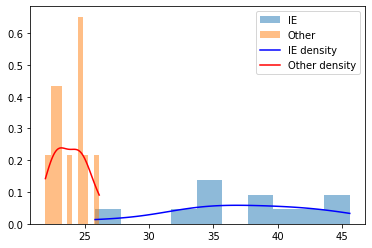

In [106]:
# Plot a histogram

kde_ie = gaussian_kde(yields_long_agg_wide.IE)
kde_other = gaussian_kde(yields_long_agg_wide.Other)

fig, ax = plt.subplots()

ax.hist(yields_long_agg_wide.IE, alpha = 0.5, label = 'IE', density = True)
ax.hist(yields_long_agg_wide.Other, alpha = 0.5, label = 'Other', density = True)

ie_range = np.linspace(min(yields_long_agg_wide.IE), max(yields_long_agg_wide.IE), 100)
other_range = np.linspace(min(yields_long_agg_wide.Other), max(yields_long_agg_wide.Other), 100)

ax.plot(ie_range, kde_ie(ie_range), color = 'blue', label = 'IE density')
ax.plot(other_range, kde_other(other_range), color = 'red', label = 'Other density')

ax.legend()

plt.show()

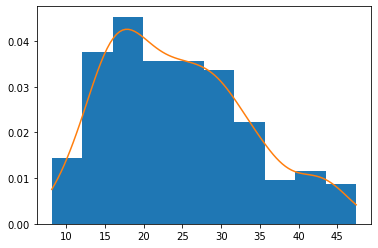

In [105]:
# There isn't much data here so I wont't aggregate

kde = gaussian_kde(yields_long.value)

fig, ax = plt.subplots()

ax.hist(yields_long.value, density = True)

kde_range = np.linspace(min(yields_long.value), max(yields_long.value), 100)

ax.plot(kde_range, kde(kde_range))

plt.show()

In [107]:
yields_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crops     264 non-null    object 
 1   strucpro  264 non-null    object 
 2   variable  264 non-null    object 
 3   geo       264 non-null    object 
 4   value     264 non-null    float64
 5   label     264 non-null    object 
dtypes: float64(1), object(5)
memory usage: 12.5+ KB
